In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mglearn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer

In [2]:
# mglearn.plots.plot_animal_tree()

学习决策树， 就是学习一系列 if/else 问题， 使我们能够以最快的速度得到正确答案。
在机器学习中， 这些问题叫作测试 （ 不要与测试集弄混， 测试集是用来测试模型泛
化性能的数据） 。 数据通常并不是像动物的例子那样具有二元特征（ 是 / 否） 的形
式， 而是表示为连续特征， 比如图 2-23 所示的二维数据集。 用于连续数据的测试形
式是： “特征 i 的值是否大于 a ？ ”

想要对新数据点进行预测， 首先要查看这个点位于特征空间划分的哪个区域， 然后将
该区域的多数目标值（ 如果是纯的叶结点， 就是单一目标值） 作为预测结果。 从根结
点开始对树进行遍历就可以找到这一区域， 每一步向左还是向右取决于是否满足相应
的测试。

防止过拟合有两种常见的策略： 一种是及早停止树的生长， 也叫预剪枝 （ prepruning） ； 另一种是先构造树， 但随后删除或折叠信息量很少的结点， 也叫后剪枝
（ post-pruning） 或 剪枝 （ pruning） 。 预剪枝的限制条件可能包括限制树的最大深
度、 限制叶结点的最大数目， 或者规定一个结点中数据点的最小数目来防止继续划
分

In [3]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)

In [4]:
tree = DecisionTreeClassifier(random_state=0).fit(X_train, y_train)

In [5]:
tree.score(X_train, y_train)

1.0

In [6]:
tree.score(X_test, y_test)

0.9370629370629371

In [7]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0).fit(X_train, y_train)

In [8]:
tree.score(X_train, y_train)

0.9882629107981221

In [9]:
tree.score(X_test, y_test)

0.951048951048951

In [10]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["malignant", "benign"],
               feature_names=cancer.feature_names, impurity=False, filled=True)

In [4]:
# import graphviz
# with open("tree.dot") as f:
#     dot_graph = f.read()
# graphviz.Source(dot_graph)
import sys 
print(sys.path)
print(sys.executable)

['', '/opt/anaconda3/lib/python36.zip', '/opt/anaconda3/lib/python3.6', '/opt/anaconda3/lib/python3.6/lib-dynload', '/opt/anaconda3/lib/python3.6/site-packages', '/opt/anaconda3/lib/python3.6/site-packages/IPython/extensions', '/home/fdl/.ipython']
/opt/anaconda3/bin/python


我们发现它只包含 8 个良性样本， 但有 134 个恶性样本。 树的这一侧的其
余分支只是利用一些更精细的区别将这 8 个良性样本分离出来。 在第一次划分右侧的
142 个样本中， 几乎所有样本（ 132 个） 最后都进入最右侧的叶结点中。

查看整个树可能非常费劲， 除此之外， 我还可以利用一些有用的属性来总结树的工作
原理。 其中最常用的是特征重要性 (feature importance), 它为每个特征对树的决策
的重要性进行排序。 对于每个特征来说， 它都是一个介于 0 和 1 之间的数字， 其中 0
表示“根本没用到”， 1 表示“完美预测目标值”。 特征重要性的求和始终为 1：

In [12]:
tree.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.01019737, 0.04839825, 0.        , 0.        , 0.0024156 ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.72682851, 0.0458159 , 0.        , 0.        , 0.0141577 ,
       0.        , 0.018188  , 0.1221132 , 0.01188548, 0.        ])

In [13]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

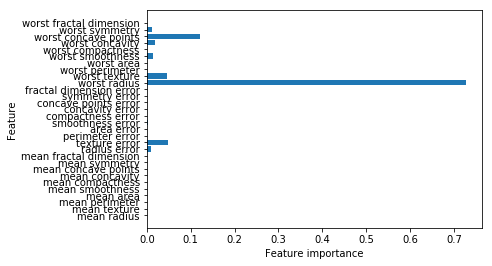

In [14]:
plot_feature_importances_cancer(tree)

Feature importances: [0. 1.]


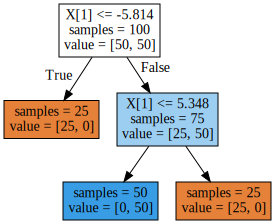

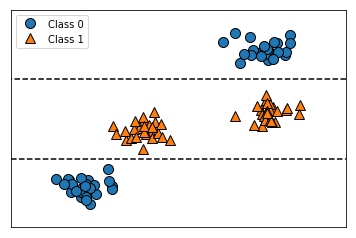

In [15]:
mglearn.plots.plot_tree_not_monotone()

DecisionTreeRegressor （ 以及其他所有基于树的回归模型） 不能外推
（ extrapolate） ， 也不能在训练数据范围之外进行预测。

决策树有两个优点： 一是得到的模型很容易可视化，
非专家也很容易理解（ 至少对于较小的树而言） ； 二是算法完全不受数据缩放的影
响。 由于每个特征被单独处理， 而且数据的划分也不依赖于缩放， 因此决策树算法不
需要特征预处理， 比如归一化或标准化。 特别是特征的尺度完全不一样时或者二元特
征和连续特征同时存在时， 决策树的效果很好。
决策树的主要缺点在于， 即使做了预剪枝， 它也经常会过拟合， 泛化性能很差。 因
此， 在大多数应用中， 往往使用下面介绍的集成方法来替代单棵决策树。

集成 （ ensemble） 是合并多个机器学习模型来构建更强大模型的方法。 在机器学习文献
中有许多模型都属于这一类， 但已证明有两种集成模型对大量分类和回归的数据集都是有
效的， 二者都以决策树为基础， 分别是随机森林（ random forest） 和梯度提升决策树
（ gradient boosted decision tree） 。